In [1]:
import hoomd
import hoomd.hpmc
import numpy
from matplotlib import pyplot
%matplotlib inline

# HPMC provided log quantities

The HPMC integrators provide additional log quantities. To demonstrate, this example executes a simulation of squares in 2D and logs all of these quantities.

In [2]:
hoomd.context.initialize('--mode=cpu');
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.2), n=10);
mc = hoomd.hpmc.integrate.convex_polygon(d=0.1, a=0.1, seed=1);
square_verts = [[-0.5, -0.5], [0.5, -0.5], [0.5, 0.5], [-0.5, 0.5]];
mc.shape_param.set('A', vertices=square_verts);

HOOMD-blue v2.1.5 CUDA (7.5) DOUBLE HPMC_MIXED MPI SSE SSE2 SSE3 SSE4_1 SSE4_2 AVX 
Compiled: 03/09/2017
Copyright 2009-2016 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
-----
You are using HPMC. Please cite the following:
* J A Anderson, M E Irrgang, and S C Glotzer. "Scalable Metropolis Monte Carlo
  for simulation of hard shapes", Computer Physics Communications 204 (2016) 21
  --30
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 100 particles


Log all additional HPMC quantities.

In [3]:
log1 = hoomd.analyze.log(filename="log-output.log",
                         quantities=['hpmc_sweep',
                                     'hpmc_translate_acceptance',
                                     'hpmc_rotate_acceptance',
                                     'hpmc_d',
                                     'hpmc_a',
                                     'hpmc_move_ratio',
                                     'hpmc_overlap_count'],
                         period=100,
                         overwrite=True);

In [4]:
hoomd.run(2000, quiet=True);

In [5]:
mc.set_params(a=0.2, d=0.2, move_ratio=0.3);

In [6]:
hoomd.run(2000, quiet=True);

## Interpreting the log output

__analyze.log__ produces a delimited text file. One way to read it is with numpy and plot columns with matplotlib.

In [7]:
!head log-output.log

timestep	hpmc_sweep	hpmc_translate_acceptance	hpmc_rotate_acceptance	hpmc_d	hpmc_a	hpmc_move_ratio	hpmc_overlap_count
0	0	0	0	0.1	0.1	0.5	0
100	400	0.5577889447	0.8208955224	0.1	0.1	0.5	0
200	800	0.5294117647	0.7244897959	0.1	0.1	0.5	0
300	1200	0.5440414508	0.7874396135	0.1	0.1	0.5	0
400	1600	0.5663265306	0.7107843137	0.1	0.1	0.5	0
500	2000	0.4105263158	0.7619047619	0.1	0.1	0.5	0
600	2400	0.5215311005	0.8167539267	0.1	0.1	0.5	0
700	2800	0.5	0.6747572816	0.1	0.1	0.5	0
800	3200	0.5300546448	0.732718894	0.1	0.1	0.5	0


In [8]:
data = numpy.genfromtxt(fname='log-output.log', skip_header=True);

A **sweep** is defined as **N** trial moves. The log quantity **hpmc_sweep** tracks the number of sweeps performed by the integrator. Note: This counter is reset to 0 whenever a new integrator is instantiated.

Log this quantity to make comparisons between runs. Different parallel configurations will perform different numbers of sweeps per time step.

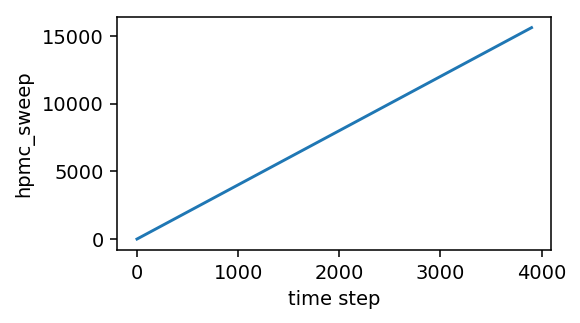

In [9]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('hpmc_sweep');

**translate_acceptance** and **rotate_acceptance** log the current trial move acceptance ratios. These are averaged only over the last timestep before the quantity is logged.

In this plot, the acceptance drops at step 2000 because the above run changed the trial move size.

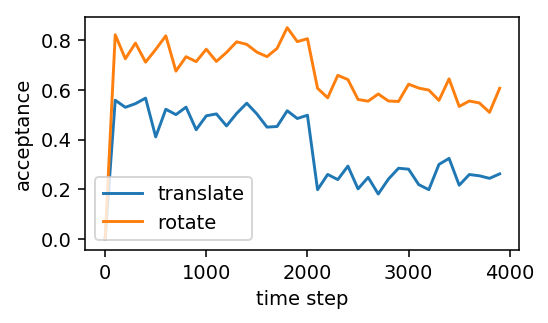

In [10]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,2], label='translate');
pyplot.plot(data[:,0], data[:,3], label='rotate');
pyplot.xlabel('time step');
pyplot.ylabel('acceptance');
pyplot.legend();

You can also log the current value of **d**, **a**, and **move_ratio**.

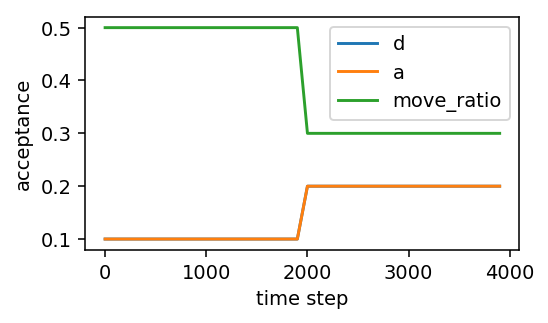

In [11]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,4], label='d');
pyplot.plot(data[:,0], data[:,5], label='a');
pyplot.plot(data[:,0], data[:,6], label='move_ratio');
pyplot.xlabel('time step');
pyplot.ylabel('acceptance');
pyplot.legend();

**hpmc_overlap_count** reports the number of particles that have overlaps with neighboring particles. This should typically be 0, but may occasionally report 1 or 2, especially in large simulations. This is due to finite precision computations - the code computed no overlaps at the time it made the trial move, but two particles are so close that when the logger checks for overlaps it decides that they do overlap. Floating point math is not identical when performed by two different code paths.

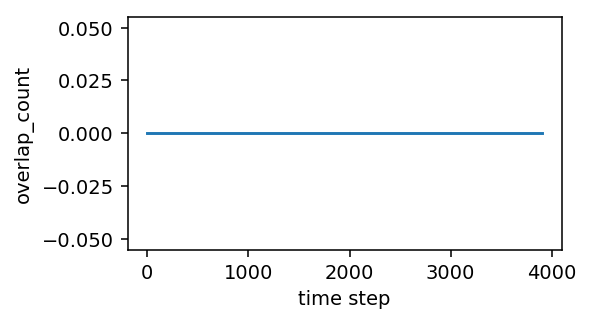

In [12]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,7], label='d');
pyplot.xlabel('time step');
pyplot.ylabel('overlap_count');